Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data collection and Pre-processing

In [ ]:
#Loading csv data to our pandas Dataframe
heart_data=pd.read_csv("/content/heart_disease_data.csv")

In [ ]:
#print first 5 rows of dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


In [ ]:
#print last 5 rows of dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
601,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
602,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
603,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
604,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
605,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0


In [ ]:
heart_data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
513,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
374,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
543,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
255,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
145,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1


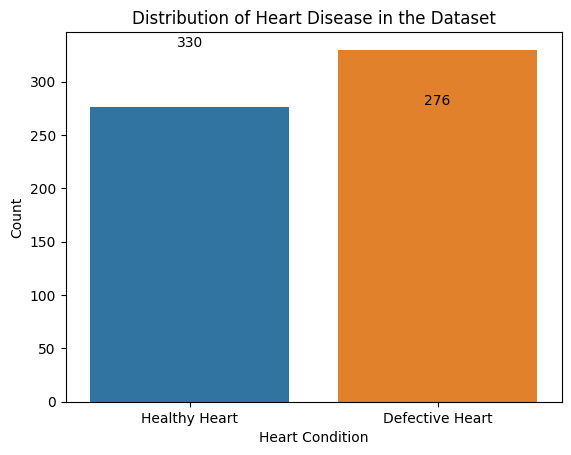

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot for the "target" variable
sns.countplot(x='target', data=heart_data)

# Set labels for the bars
plt.xticks([0, 1], ['Healthy Heart', 'Defective Heart'])

# Show the count of each class
target_counts = heart_data['target'].value_counts()
for i, count in enumerate(target_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Set labels and title for the plot
plt.xlabel("Heart Condition")
plt.ylabel("Count")
plt.title("Distribution of Heart Disease in the Dataset")

# Show the plot
plt.show()


<Axes: >

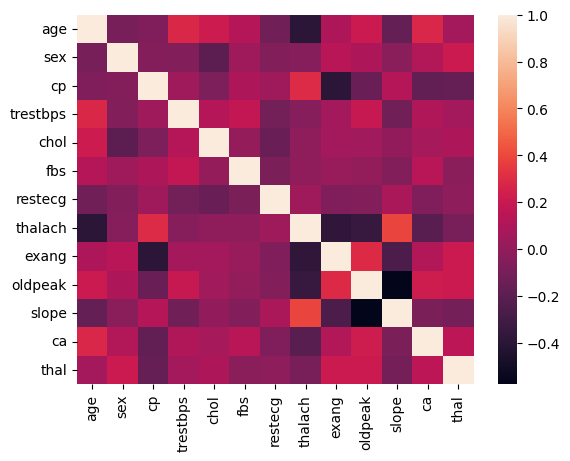

In [ ]:
import seaborn as sns
x=heart_data.iloc[:,0:-1].corr()
sns.heatmap(x)

The data to be plotted:

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     48    1   0       130   256    1        0      150      1      0.0   
1     61    1   0       148   203    0        1      161      0      0.0   
2     44    0   2       118   242    0        1      149      0      0.3   
3     47    1   0       110   275    0        0      118      1      1.0   
4     56    1   3       120   193    0        0      162      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
601   60    1   2       140   185    0        0      155      0      3.0   
602   67    0   2       115   564    0        0      160      0      1.6   
603   40    1   3       140   199    0        1      178      1      1.4   
604   50    0   0       110   254    0        0      159      0      0.0   
605   62    1   1       120   281    0        0      103      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  


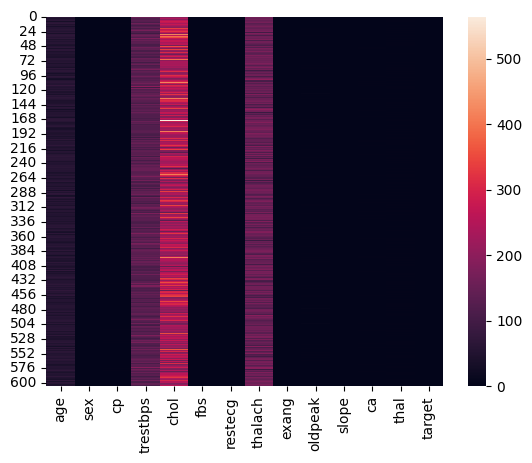

In [ ]:
# importing the modules
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
data = np.random.randint(low = 1,
						high = 100,
						size = (10, 10))
print("The data to be plotted:\n")
print(heart_data)
hm = sn.heatmap(data = heart_data)

# displaying the plotted heatmap
plt.show()


In [ ]:
#number of rows and columns in dataset
heart_data.shape

(606, 14)

In [ ]:
#getting info about data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       606 non-null    int64  
 1   sex       606 non-null    int64  
 2   cp        606 non-null    int64  
 3   trestbps  606 non-null    int64  
 4   chol      606 non-null    int64  
 5   fbs       606 non-null    int64  
 6   restecg   606 non-null    int64  
 7   thalach   606 non-null    int64  
 8   exang     606 non-null    int64  
 9   oldpeak   606 non-null    float64
 10  slope     606 non-null    int64  
 11  ca        606 non-null    int64  
 12  thal      606 non-null    int64  
 13  target    606 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 66.4 KB


In [ ]:
#checking for missing values
heart_data.isnull().sum()
#It gives no.of elements in missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#statistical measures of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.074592,0.465626,1.031199,17.523642,51.787898,0.355903,0.525425,22.886223,0.469406,1.160115,0.615717,1.021761,0.611770,0.498422
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#checking the distribution of target variable
heart_data['target'].value_counts()

1    330
0    276
Name: target, dtype: int64

1-Defective Heart

0-Healthy Heart

In [ ]:
heart_data["target"].unique()

array([0, 1])

In [ ]:
#splitting the features and Target
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     48    1   0       130   256    1        0      150      1      0.0   
1     61    1   0       148   203    0        1      161      0      0.0   
2     44    0   2       118   242    0        1      149      0      0.3   
3     47    1   0       110   275    0        0      118      1      1.0   
4     56    1   3       120   193    0        0      162      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
601   60    1   2       140   185    0        0      155      0      3.0   
602   67    0   2       115   564    0        0      160      0      1.6   
603   40    1   3       140   199    0        1      178      1      1.4   
604   50    0   0       110   254    0        0      159      0      0.0   
605   62    1   1       120   281    0        0      103      0      1.4   

     slope  ca  thal  
0        2   2     3  
1        2   1     3  
2        1   1    

In [ ]:
print(Y)

0      0
1      0
2      1
3      0
4      1
      ..
601    0
602    1
603    1
604    1
605    0
Name: target, Length: 606, dtype: int64


SPLITTING THE DATA INTO TRAINING AND TESTING DATA

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(606, 13) (484, 13) (122, 13)


MODEL TRAINING (LOGISTIC REGRESSION MODEL,KNN,RANDOM FOREST)

In [ ]:
model=LogisticRegression()

In [ ]:
#training logistic regression model with training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

ACCURACY OF TRAINING AND TESTING DATA USING LOGISTIC REGRESSION,KNN ALGORITHM AND RANDOM FOREST.

In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print("Accuracy on training data using logistic regression : ",training_data_accuracy)

Accuracy on training data using logistic regression :  0.8636363636363636


In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print("Accuracy on testing data using logistic regression : ",test_data_accuracy)

Accuracy on testing data using logistic regression :  0.8360655737704918


In [ ]:
from sklearn.metrics import accuracy_score
Y_train_prediction_rf = classifier.predict(X_train)
training_data_accuracy_rf = accuracy_score(Y_train_prediction_rf, Y_train)
print("Accuracy on training data (Random Forest):", training_data_accuracy_rf)
Y_test_prediction_rf = classifier.predict(X_test)
test_data_accuracy_rf = accuracy_score(Y_test_prediction_rf, Y_test)
print("Accuracy on testing data (Random Forest):", test_data_accuracy_rf)


Accuracy on training data (Random Forest): 0.9979338842975206
Accuracy on testing data (Random Forest): 0.9590163934426229


In [ ]:
from sklearn.metrics import accuracy_score
Y_train_pred = classifier.predict(X_train)
training_accuracy = accuracy_score(Y_train, Y_train_pred)
print("Accuracy on training data (KNN):", training_accuracy)
Y_test_pred = classifier.predict(X_test)
testing_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Accuracy on testing data (KNN):", testing_accuracy)


Accuracy on training data (KNN): 0.9979338842975206
Accuracy on testing data (KNN): 0.9590163934426229


BUILDING A PREDICTIVE SYSTEM

In [ ]:
input_data = (44,0,2,118,242,0,1,149,0,0.3,1,1,2)
#change input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
  print("The person does not have Heart Disease ")
else:
  print("The person has Heart Disease")

[1]
The person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (48,1,0,130,256,1,0,150,1,0.0,2,2,3)
#change input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
  print("The person does not have Heart Disease ")
else:
  print("The person has Heart Disease")

[0]
The person does not have Heart Disease 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
